The following generates probabilities under pure repetition.
There is multiple sources giving the same probability. Here we do a quick simulation of the outcome where the Receiver treats each of the Sources as being independent and in the posession of different information.

In [1]:
from bayesprob import *

<Axes: >

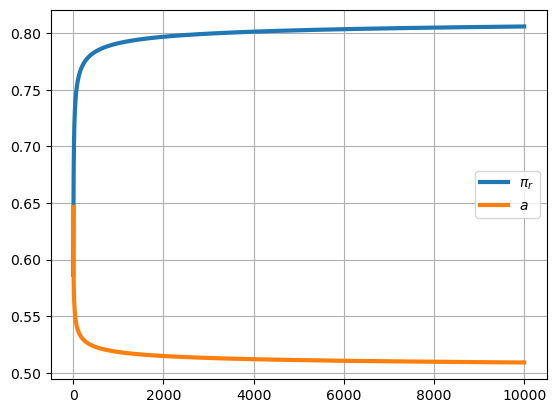

In [2]:
#Tracing Pure Repetion Probabilities for one specified probability
a=bayes(n_0=2,a_0=.5,theta=.9,phi=.1)

a.p=.66              #The stated probability that will be repeated by multiple sources
repetitions=10000    #How many times or number of sources for which the probability is repeated 

V=[]
for i in range(repetitions): 
    V+=[[a.a(),a.n(), a.N(), a.X(), a.XoN(), a.lamda(),a.prob()]] 
    a.n_r+=a.N()
    a.a_r=a.prob()
V=frame(V)
V.columns=symbols[:7]

V[[symbols[6],symbols[0]]].plot(grid=True,lw=3)  

# Figure B2

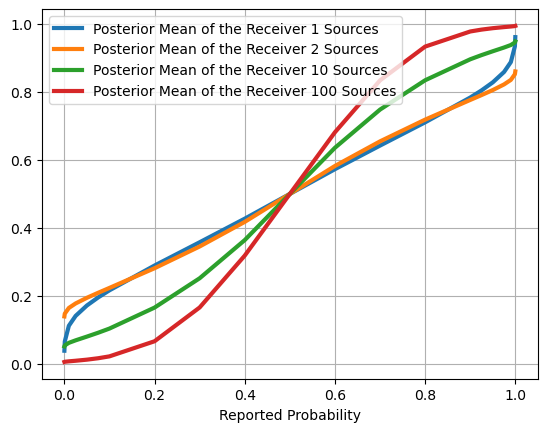

In [4]:
#Tracing the end probability of repetition of one probability for a range of probabilities
replist=[1, 2,10,100]  #List of number of sources to be simulated
Vs=[]
for reps in replist:
    V=[]
    for i in [.0001,.001,.01,.025,.05,.075,.1,.2,.3,.4,.5,.6,.7,.8,.9,.925,.95,.975,.99,.999,.9999]:
        a1=bayes()
        lst1=[]
        for j in range(reps):
           lst1+=[i] 
        m=float(frame(lst1).mean().iloc[0])
        V1,v1=sequential(lst1,a1)
        V+=[[m,v1]]
    V=frame(V)
    V.index=V[0]
    V.index.name='Reported Probability'
    V=V.drop(0,axis=1)
    V.columns=['Posterior Mean of the Receiver ' + str(reps) + ' Sources']
    Vs+=[V]
    
fig,ax=plt.subplots()
for v in Vs:
    v.plot(ax=ax, grid=True,lw=3)
    
#plt.savefig(direcout+'FigA2'+'.png',bbox_inches='tight')